In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
airlines_data = pd.read_excel('airlines_data.xlsx', index_col='Month', parse_dates=True)
airlines_data.index.freq = 'MS'
airlines_data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [7]:
airlines_data.tail()

,Passengers
Month,
2002-08-01,405
2002-09-01,355
2002-10-01,306
2002-11-01,271
2002-12-01,306


In [8]:
airlines_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Freq: MS
Data columns (total 1 columns):
Passengers    96 non-null int64
dtypes: int64(1)
memory usage: 1.5 KB


### Train Test Split

In [9]:
train_data = airlines_data[:84]
test_data = airlines_data[84:]

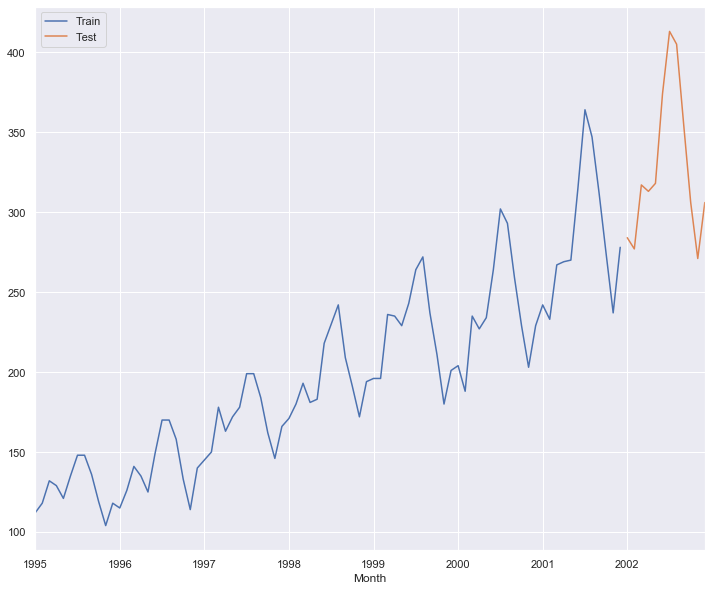

In [12]:
train_data['Passengers'].plot(legend=True, label='Train')
test_data['Passengers'].plot(legend=True, label='Test', figsize=(12,10))
plt.show()

## Using Holts Winter Model

In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train_data['Passengers'], trend='mul', seasonal='mul', seasonal_periods=12)
fitted_model = model.fit()

In [14]:
predicted_model = fitted_model.forecast(12)

In [15]:
predicted_model

2002-01-01    282.796489
2002-02-01    281.343974
2002-03-01    327.552083
2002-04-01    318.796149
2002-05-01    318.781415
2002-06-01    359.038513
2002-07-01    402.474848
2002-08-01    399.064792
2002-09-01    355.991676
2002-10-01    314.504861
2002-11-01    275.382495
2002-12-01    315.685722
Freq: MS, dtype: float64

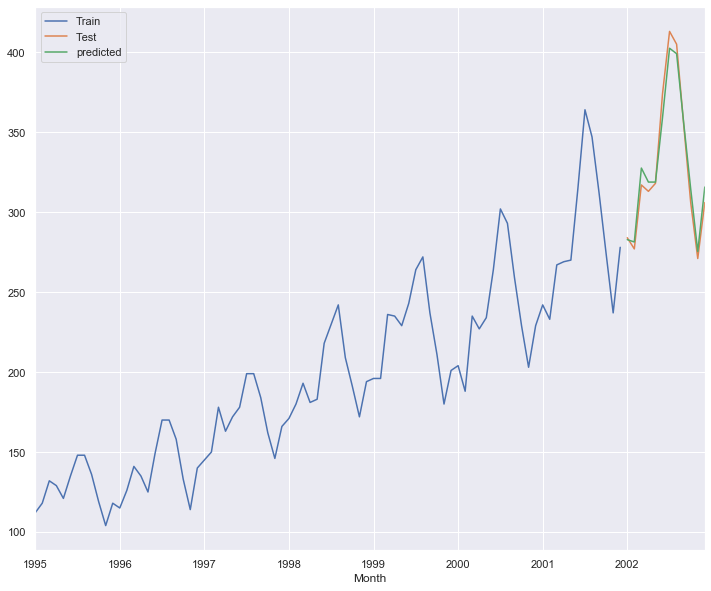

In [17]:
train_data['Passengers'].plot(legend=True, label='Train')
test_data['Passengers'].plot(legend=True, label='Test', figsize=(12,10))
predicted_model.plot(legend=True, label="predicted")

### Evaluation Metrics

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
mean_squared_error(test_data, predicted_model)

60.17150929722835

In [20]:
np.sqrt(mean_squared_error(test_data, predicted_model))

7.757029669740109

In [21]:
test_data.describe()

,Passengers
count,12.00000
mean,328.25000
std,47.86178
min,271.00000
25%,300.50000
50%,315.00000
75%,359.75000
max,413.00000


### Forecasting into the future

In [22]:
final_model = ExponentialSmoothing(airlines_data["Passengers"], trend='mul', seasonal='mul', seasonal_periods=12).fit()
forecast_prediction = final_model.forecast(24)

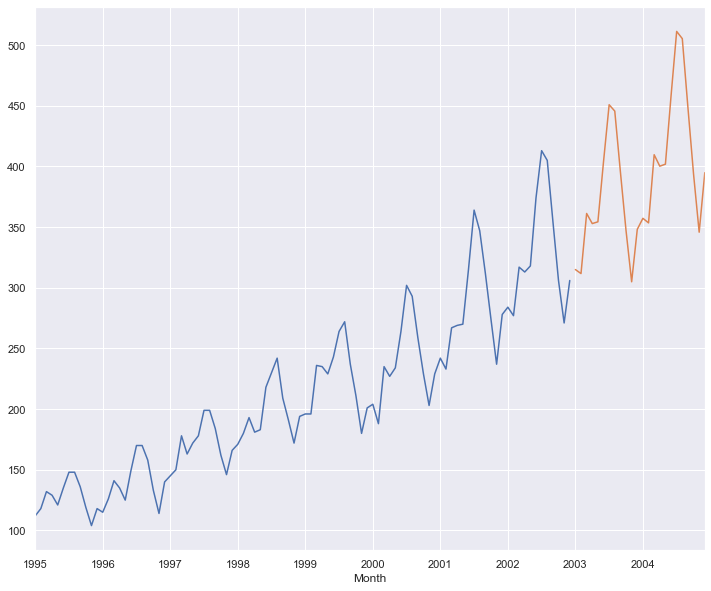

In [23]:
airlines_data['Passengers'].plot(figsize=(12,10))
forecast_prediction.plot()